In [44]:
import math

def utmToLatLng(easting, northing, zone=2, northernHemisphere=True):
    if not northernHemisphere:
        northing = 10000000 - northing

    a = 6378137
    e = 0.081819191
    e1sq = 0.006739497
    k0 = 0.9996

    arc = northing / k0
    mu = arc / (a * (1 - math.pow(e, 2) / 4.0 - 3 * math.pow(e, 4) / 64.0 - 5 * math.pow(e, 6) / 256.0))

    ei = (1 - math.pow((1 - e * e), (1 / 2.0))) / (1 + math.pow((1 - e * e), (1 / 2.0)))

    ca = 3 * ei / 2 - 27 * math.pow(ei, 3) / 32.0

    cb = 21 * math.pow(ei, 2) / 16 - 55 * math.pow(ei, 4) / 32
    cc = 151 * math.pow(ei, 3) / 96
    cd = 1097 * math.pow(ei, 4) / 512
    phi1 = mu + ca * math.sin(2 * mu) + cb * math.sin(4 * mu) + cc * math.sin(6 * mu) + cd * math.sin(8 * mu)

    n0 = a / math.pow((1 - math.pow((e * math.sin(phi1)), 2)), (1 / 2.0))

    r0 = a * (1 - e * e) / math.pow((1 - math.pow((e * math.sin(phi1)), 2)), (3 / 2.0))
    fact1 = n0 * math.tan(phi1) / r0

    _a1 = 500000 - easting
    dd0 = _a1 / (n0 * k0)
    fact2 = dd0 * dd0 / 2

    t0 = math.pow(math.tan(phi1), 2)
    Q0 = e1sq * math.pow(math.cos(phi1), 2)
    fact3 = (5 + 3 * t0 + 10 * Q0 - 4 * Q0 * Q0 - 9 * e1sq) * math.pow(dd0, 4) / 24

    fact4 = (61 + 90 * t0 + 298 * Q0 + 45 * t0 * t0 - 252 * e1sq - 3 * Q0 * Q0) * math.pow(dd0, 6) / 720

    lof1 = _a1 / (n0 * k0)
    lof2 = (1 + 2 * t0 + Q0) * math.pow(dd0, 3) / 6.0
    lof3 = (5 - 2 * Q0 + 28 * t0 - 3 * math.pow(Q0, 2) + 8 * e1sq + 24 * math.pow(t0, 2)) * math.pow(dd0, 5) / 120
    _a2 = (lof1 - lof2 + lof3) / math.cos(phi1)
    _a3 = _a2 * 180 / math.pi

    latitude = 180 * (phi1 - fact1 * (fact2 + fact3 + fact4)) / math.pi

    if not northernHemisphere:
        latitude = -latitude

    longitude = ((zone > 0) and (6 * zone - 183.0) or 3.0) - _a3

    return (latitude,180+longitude)

In [13]:
import osmnx as ox

G = ox.graph_from_place("Saint-Denis, France")
Gp = ox.project_graph(G)
points = ox.utils_geo.sample_points(ox.get_undirected(Gp), 5)

In [3]:
import geopandas as gpd
from shapely.geometry import Point


# Access the point values using the .x and .y attributes
for point in points:
    print("Point:", point)
    print("X coordinate:", point.x)
    print("Y coordinate:", point.y)
    print("Coordinates translated: ", utmToLatLng(point.x, point.y, zone=1, northernHemisphere=True))
    print("=" * 20)


Point: POINT (455013.37148238654 5421281.315521153)
X coordinate: 455013.37148238654
Y coordinate: 5421281.315521153
Coordinates translated:  (48.94282044243652, 2.385646988393148)
Point: POINT (453661.81396612554 5420214.816170759)
X coordinate: 453661.81396612554
Y coordinate: 5420214.816170759
Coordinates translated:  (48.93312731232799, 2.367312072015949)
Point: POINT (453465.22926400945 5418593.944665825)
X coordinate: 453465.22926400945
Y coordinate: 5418593.944665825
Coordinates translated:  (48.91853252677025, 2.3648130864843324)
Point: POINT (453027.4241554292 5417475.95958317)
X coordinate: 453027.4241554292
Y coordinate: 5417475.95958317
Coordinates translated:  (48.90844297023706, 2.35896623759902)
Point: POINT (453808.8665641993 5420936.022605711)
X coordinate: 453808.8665641993
Y coordinate: 5420936.022605711
Coordinates translated:  (48.93962568439047, 2.36923802322454)


In [1]:
data = [
    ("Paris", 2181371),
    ("Marseille", 839043),
    ("Lyon", 472305),
    ("Toulouse", 437715),
    ("Nice", 347060),
    ("Nantes", 282853),
    ("Montpellier", 251634),
    ("Strasbourg", 272975),
    ("Bordeaux", 232260),
    ("Lille", 226014),
    ("Rennes", 209613),
    ("Reims", 183837),
    ("Toulon", 167816),
    ("Saint-Étienne", 177480),
    ("Le Havre", 182580),
    ("Grenoble", 156107),
    ("Dijon", 151504),
    ("Angers", 152337),
    #("Saint-Denis (Réunion)", 138314),
    ("Villeurbanne", 136473),
    ("Nîmes", 144092),
    ("Clermont-Ferrand", 138992),
    ("Aix-en-Provence", 142534),
    ("Le Mans", 144016),
    ("Brest", 144548),
    ("Tours", 136942),
    ("Amiens", 136105),
    ("Limoges", 136539),
    ("Annecy", 51023),
    ("Boulogne-Billancourt", 110251),
    ("Perpignan", 115326),
    ("Metz", 124435),
    ("Besançon", 117080),
    ("Orléans", 113130),
    ("Seine-Saint-Denis", 97875),
    ("Rouen", 107904),
    ("Montreuil", 101587),
    ("Argenteuil", 102683),
    ("Mulhouse", 110514),
    ("Caen", 110399),
    ("Nancy", 105468),
    #("Saint-Paul (Réunion)", 99291),
    ("Roubaix", 97952),
    ("Tourcoing", 92357),
    ("Nanterre", 88316),
    ("Vitry-sur-Seine", 82902),
    ("Créteil", 88939),
    ("Avignon", 92454),
    ("Poitiers", 88776),
    ("Aubervilliers", 73506),
    ("Asnières-sur-Seine", 82351),
    ("Aulnay-sous-Bois", 81600),
    ("Colombes", 82026),
    ("Dunkirk", 69274),
    #("Saint-Pierre (Réunion)", 74480),
    ("Versailles", 87549),
    ("Courbevoie", 84415),
    #("Le Tampon (Réunion)", 69849),
    ("Cherbourg-en-Cotentin", 78549),
    ("Rueil-Malmaison", 77625),
    ("Béziers", 72245),
    ("La Rochelle", 77196),
    ("Champigny-sur-Marne", 74863),
    #("Fort-de-France", 90347),
    ("Pau", 83903),
    ("Saint-Maur-des-Fossés", 75214),
    ("Cannes", 70610),
    ("Antibes", 75820),
    ("Calais", 74888),
    ("Drancy", 66063),
    ("Mérignac", 65469),
    #("Mamoudzou (Mayotte)", 53122),
    ("Saint-Nazaire", 68838),
    ("Ajaccio", 66063),
    ("Colmar", 65713),
    ("Issy-les-Moulineaux", 61471),
    ("Noisy-le-Grand", 61341),
    ("Vénissieux", 57179),
    ("Évry-Courcouronnes", 66851),
    ("Levallois-Perret", 62851),
    ("Cergy", 56873),
    #("Cayenne (French Guiana)", 58004),
    ("Pessac", 57187),
    ("Valence (Drôme)", 65263),
    ("Bourges", 70828),
    ("Ivry-sur-Seine", 55608),
    ("Quimper", 64902),
    ("Clichy", 57162),
    ("La Seyne-sur-Mer", 56768),
    ("Antony", 60552),
    ("Troyes", 61344),
    ("Villeneuve-d'Ascq", 61151),
    ("Montauban", 53941),
    ("Pantin", 53577),
    ("Neuilly-sur-Seine", 61471),
    ("Sarcelles", 58654),
    ("Niort", 58066),
    ("Chambéry", 57543),
    ("Le Blanc-Mesnil", 51109),
    ("Lorient", 58547),
    ("Beauvais", 55481),
    ("Maisons-Alfort",53233),
    ("Meaux",48842),
    ("Narbonne", 50776),
    ("Villejuif",50571),
    ("Chelles",48616)
]

In [18]:
data2 = [
    ("Paris", 2181371),
    ("Marseille", 839043),
    ("Lyon", 472305),
    ("Toulouse", 437715),
    ("Nice", 347060),
    ("Nantes", 282853),
    ("Montpellier", 251634),
    ("Strasbourg", 272975),
    ("Bordeaux", 232260),
    ("Lille", 226014),
    ("Rennes", 209613),
    ("Reims", 183837),
    ("Toulon", 167816),
    ("Saint-Étienne", 177480),
    ("Le Havre", 182580),
    ("Grenoble", 156107),
    ("Dijon", 151504),
    ("Angers", 152337),
    #("Saint-Denis (Réunion)", 138314),
    ("Villeurbanne", 136473),
    ("Nîmes", 144092),
    ("Clermont-Ferrand", 138992),
    ("Aix-en-Provence", 142534),
    ("Le Mans", 144016),
    ("Brest", 144548),
    ("Tours", 136942),
    ("Amiens", 136105),
    ("Limoges", 136539),
    ("Annecy", 51023),
    ("Boulogne-Billancourt", 110251),
    ("Perpignan", 115326),
    ("Metz", 124435),
    ("Besançon", 117080),
    ("Orléans", 113130),
    ("Seine-Saint-Denis", 97875),
    ("Rouen", 107904),
    ("Montreuil", 101587),
    ("Argenteuil", 102683),
    ("Mulhouse", 110514),
    ("Caen", 110399),
    ("Nancy", 105468),
    #("Saint-Paul (Réunion)", 99291),
    ("Roubaix", 97952),
    ("Tourcoing", 92357),
    ("Nanterre", 88316),
    ("Vitry-sur-Seine", 82902),
    ("Créteil", 88939),
    ("Avignon", 92454),
    ("Poitiers", 88776),
    ("Aubervilliers", 73506),
    ("Asnières-sur-Seine", 82351),
    ("Aulnay-sous-Bois", 81600),
    ("Colombes", 82026),
    ("Dunkirk", 69274),
    #("Saint-Pierre (Réunion)", 74480),
    ("Versailles", 87549),
    ("Courbevoie", 84415),
    #("Le Tampon (Réunion)", 69849),
    ("Cherbourg-en-Cotentin", 78549),
    ("Rueil-Malmaison", 77625),
    ("Béziers", 72245),
    ("La Rochelle", 77196),
    ("Champigny-sur-Marne", 74863),
    #("Fort-de-France", 90347),
    ("Pau", 83903),
    ("Saint-Maur-des-Fossés", 75214),
    ("Cannes", 70610),
    ("Antibes", 75820),
    ("Calais", 74888),
    ("Drancy", 66063),
    ("Mérignac", 65469),
    #("Mamoudzou (Mayotte)", 53122),
    ("Saint-Nazaire", 68838),
    ("Ajaccio", 66063),
    ("Colmar", 65713),
    ("Issy-les-Moulineaux", 61471),
    ("Noisy-le-Grand", 61341),
    ("Vénissieux", 57179),
    ("Évry-Courcouronnes", 66851),
    ("Levallois-Perret", 62851),
    ("Cergy", 56873),
    #("Cayenne (French Guiana)", 58004),
    ("Pessac", 57187),
    ("Valence (Drôme)", 65263),
    ("Bourges", 70828),
    ("Ivry-sur-Seine", 55608),
    ("Quimper", 64902),
    ("Clichy", 57162),
    ("La Seyne-sur-Mer", 56768),
    ("Antony", 60552),
    ("Troyes", 61344),
    ("Villeneuve-d'Ascq", 61151),
    ("Montauban", 53941),
    ("Pantin", 53577),
    ("Neuilly-sur-Seine", 61471),
    ("Sarcelles", 58654),
    #("Niort", 58066),
    ("Chambéry", 57543),
    ("Le Blanc-Mesnil", 51109),
    ("Lorient", 58547),
    ("Beauvais", 55481),
    ("Maisons-Alfort",53233),
    ("Meaux",48842),
    ("Narbonne", 50776),
    ("Villejuif",50571),
    ("Chelles",48616),
    ("La Roche-sur-Yon",50717),
    ("Hyères", 55007)
]

In [19]:
len(data), len(data2)

(99, 100)

In [72]:
sum2 = 0
for i in range(100):
    sum2+=data2[i][1]

In [73]:
city_data2 = []
for i in range(100):
    city_data2.append((data2[i][0],data2[i][1]/sum2))

In [78]:
import os

In [22]:
home_cities_path = os.path.expanduser("~/Documents/Cities2")
new_directory_name = "new_folder"
new_directory_path = os.path.join(home_cities_path, new_directory_name)
if not os.path.exists(new_directory_path):
    os.makedirs(new_directory_path)
    print(f"Directory '{new_directory_name}' created successfully.")
else:
    print(f"Directory '{new_directory_name}' already exists.")


Directory 'new_folder' created successfully.


In [27]:
home_cities_path

'/home/jovyan/Documents/Cities'

In [82]:
anz=15000
for city, size in city_data2[::-1]:
    print(city)
    number = math.floor(size*anz)
    print(number)
    town = city + ", France"
    print(town)
    G = ox.graph_from_place(town)
    print("here")
    Gp = ox.project_graph(G)
    points = ox.utils_geo.sample_points(ox.get_undirected(Gp), number)
    
    home_cities_path = os.path.expanduser("/home/jovyan/Documents/Cities2")
    new_directory_name = city
    new_directory_path = os.path.join(home_cities_path, new_directory_name)
    os.makedirs(new_directory_path)
    # Specify the file path
    file_path = "/home/jovyan/Documents/Cities2/" + city + "/" + city + ".txt"

    # Content to write to the file
    file_content = ""
    location = geolocator.geocode(city + ", France")
    print(location.longitude)
    if location.longitude<0:
        for point in points:
            x, y = utmToLatLng(point.x, point.y, zone=1, northernHemisphere=True)
            y = y-6
            file_content = file_content + "(" + str(x) + ", " + str(y) + ")" + "\n"
    if (location.longitude>6):
        for point in points:
            x, y = utmToLatLng(point.x, point.y, zone=1, northernHemisphere=True)
            y = y+6
            file_content = file_content + "(" + str(x) + ", " + str(y) + ")" + "\n"
    if location.longitude>=0 and location.longitude<=6:
        for point in points:
            x, y = utmToLatLng(point.x, point.y, zone=1, northernHemisphere=True)
            file_content = file_content + "(" + str(x) + ", " + str(y) + ")" + "\n"
    
    # Open the file in write mode and write content
    with open(file_path, "w") as file:
        file.write(file_content)

Hyères
60
Hyères, France
here
6.1301614
La Roche-sur-Yon
55
La Roche-sur-Yon, France
here
-1.4269698
Chelles
53
Chelles, France
here
3.0344372
Villejuif
55
Villejuif, France
here
2.3633048
Narbonne
55
Narbonne, France
here
3.0041906
Meaux
53
Meaux, France
here
2.8773541
Maisons-Alfort
58
Maisons-Alfort, France
here
2.4309703
Beauvais
61
Beauvais, France
here
2.0823355
Lorient
64
Lorient, France
here
-3.3660907
Le Blanc-Mesnil
56
Le Blanc-Mesnil, France
here
2.4631476
Chambéry
63
Chambéry, France
here
5.9203636
Sarcelles
64
Sarcelles, France
here
2.3796245
Neuilly-sur-Seine
67
Neuilly-sur-Seine, France
here
2.2695658
Pantin
58
Pantin, France
here
2.4019804
Montauban
59
Montauban, France
here
1.3549991
Villeneuve-d'Ascq
67
Villeneuve-d'Ascq, France
here
3.1314002
Troyes
67
Troyes, France
here
4.0746257
Antony
66
Antony, France
here
2.2959423
La Seyne-sur-Mer
62
La Seyne-sur-Mer, France
here
5.8788948
Clichy
62
Clichy, France
here
2.30551
Quimper
71
Quimper, France
here
-4.1024782
Ivry-su

In [24]:
for point in l[0]:
    print("Point:", point)
    print("X coordinate:", point.x)
    print("Y coordinate:", point.y)
    print("Coordinates translated: ", utmToLatLng(point.x, point.y, zone=1, northernHemisphere=True))
    print("=" * 20)
    x, y = utmToLatLng(point.x, point.y, zone=1, northernHemisphere=True)
    print(type(x))

Point: POINT (497915.5405560347 4780852.47567302)
X coordinate: 497915.5405560347
Y coordinate: 4780852.47567302
Coordinates translated:  (43.18043539063845, 2.9743512519791864)
<class 'numpy.float64'>
Point: POINT (499761.9270342389 4781191.2069933675)
X coordinate: 499761.9270342389
Y coordinate: 4781191.2069933675
Coordinates translated:  (43.183488436941765, 2.997070426189282)
<class 'numpy.float64'>


In [11]:
anz=50
l=[]
for city, size in city_data:
    print(city)
    number = math.floor(size*anz)
    print(number)
    town = city + ", France"
    print(town)
    G = ox.graph_from_place(town)
    print("here")
    Gp = ox.project_graph(G)
    points = ox.utils_geo.sample_points(ox.get_undirected(Gp), number)
    l.append(points)
l

Paris
7
Paris, France


KeyboardInterrupt: 

In [85]:
import zipfile

# Specify the folder to be zipped
folder_to_zip = "/home/jovyan/Documents"

# Specify the output ZIP file path
output_zip_file = "/home/jovyan/Cities2.zip"

# Create a ZIP archive
with zipfile.ZipFile(output_zip_file, "w") as zipf:
    for root, _, files in os.walk(folder_to_zip):
        for file in files:
            file_path = os.path.join(root, file)
            zipf.write(file_path, os.path.relpath(file_path, folder_to_zip))
            
print(f"Folder '{folder_to_zip}' successfully zipped to '{output_zip_file}'.")


Folder '/home/jovyan/Documents' successfully zipped to '/home/jovyan/Cities2.zip'.


In [81]:
import shutil

shutil.rmtree("/home/jovyan/Documents/Cities2/Hyères")


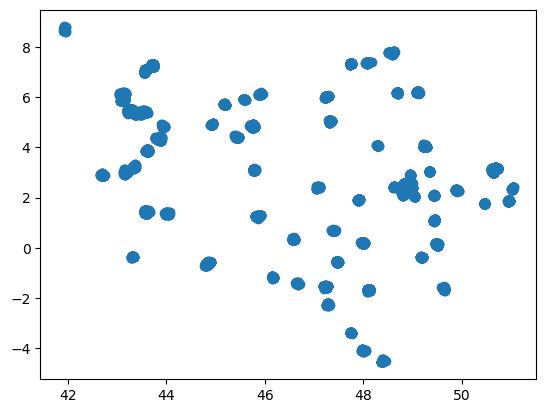

In [83]:
import matplotlib.pyplot as plt
import ast

xs = []
ys = []
for city, size in data2:
    path = "/home/jovyan/Documents/Cities2/" + city + "/" + city + ".txt"
    #print(city)
    with open(path, "r") as file:
        file_content = file.read()
        # Example string with newline characters
        #multiline_string = "Line 1\nLine 2\nLine 3"

        # Using splitlines() method
        lines_list = file_content.splitlines()

        # Printing individual lines
        #for line in lines_list:
    #print(line)

        for line in lines_list:
            #print(line)
            x = ast.literal_eval(line)
            xs.append(x[0])
            ys.append(x[1])
plt.scatter(xs, ys)

In [29]:
data[59]

('Fort-de-France', 90347)

In [4]:
import sys
!{sys.executable} -m pip install geopy
# Import the required library
from geopy.geocoders import Nominatim

# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")

location = geolocator.geocode("Bordeaux")

print("The latitude of the location is: ", location.latitude)
print("The longitude of the location is: ", location.longitude)

  Using cached geopy-2.3.0-py3-none-any.whl (119 kB)
  Using cached geographiclib-2.0-py3-none-any.whl (40 kB)
The latitude of the location is:  44.841225
The longitude of the location is:  -0.5800364


Paris
Marseille
Lyon
Toulouse
Nice
Nantes
Montpellier
Strasbourg
Bordeaux
Lille
Rennes
Reims
Toulon
Saint-Étienne
Le Havre
Grenoble
Dijon
Angers
Villeurbanne
Nîmes
Clermont-Ferrand
Aix-en-Provence
Le Mans
Brest
Tours
Amiens
Limoges
Annecy
Boulogne-Billancourt
Perpignan
Metz
Besançon
Orléans
Seine-Saint-Denis
Rouen
Montreuil
Argenteuil
Mulhouse
Caen
Nancy
Roubaix
Tourcoing
Nanterre
Vitry-sur-Seine
Créteil
Avignon
Poitiers
Aubervilliers
Asnières-sur-Seine
Aulnay-sous-Bois
Colombes
Dunkirk
Versailles
Courbevoie
Cherbourg-en-Cotentin
Rueil-Malmaison
Béziers
La Rochelle
Champigny-sur-Marne
Pau
Saint-Maur-des-Fossés
Cannes
Antibes
Calais
Drancy
Mérignac
Saint-Nazaire
Ajaccio
Colmar
Issy-les-Moulineaux
Noisy-le-Grand
Vénissieux
Évry-Courcouronnes
Levallois-Perret
Cergy
Pessac
Valence (Drôme)
Bourges
Ivry-sur-Seine
Quimper
Clichy
La Seyne-sur-Mer
Antony
Troyes
Villeneuve-d'Ascq
Montauban
Pantin
Neuilly-sur-Seine
Sarcelles
Chambéry
Le Blanc-Mesnil
Lorient
Beauvais
Maisons-Alfort
Meaux
Narbonne


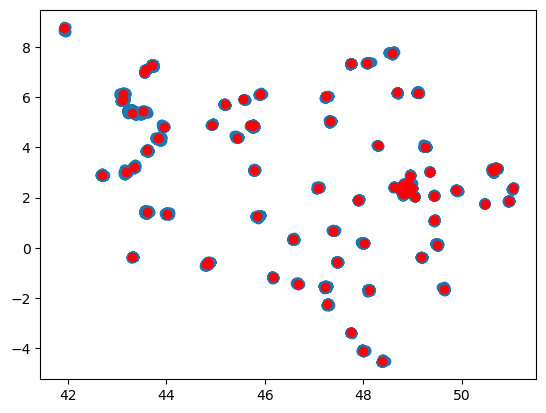

In [84]:
xs2=[]
ys2=[]
for city, size in data2:
    print(city)
    location = geolocator.geocode(city + ", France")
    xs2.append(location.latitude)
    ys2.append(location.longitude)

plt.scatter(xs, ys)
plt.scatter(xs2, ys2, color="red")

In [40]:
print(7)

7


In [45]:
#import sys
#!{sys.executable} -m pip install osmnx
import osmnx as ox
city="Bordeaux"
print(city)
number = 5 #math.floor(size*anz)
print(number)
town = city + ", France"
print(town)
G = ox.graph_from_place(town)
print("here")
Gp = ox.project_graph(G)
points = ox.utils_geo.sample_points(ox.get_undirected(Gp), number)
for point in points:
    x, y = utmToLatLng(point.x, point.y, zone=1, northernHemisphere=True)
    print(x, y)
    


Bordeaux
5
Bordeaux, France
here
44.83517600406095 5.414167556735663
44.839517977144915 5.432874938882549
44.89224783672743 5.422572788361634
44.8297017245549 5.397027432691516
44.87437417776255 5.437856329308772


In [53]:
import osmnx as ox
city="Bordeaux"
print(city)
number = 5 #math.floor(size*anz)
print(number)
town = city + ", France"
print(town)
G = ox.graph_from_place(town)
print("here")
Gp = ox.project_graph(G)
points = ox.utils_geo.sample_points(ox.get_undirected(Gp), number)
for point in points:
    x, y = utmToLatLng(point.x, point.y, zone=0, northernHemisphere=True)
    print(x, y)

Bordeaux
5
Bordeaux, France
here
44.82781932583751 185.43380549874672
44.861009291271145 185.36934521492765
44.83186139040042 185.45742273146058
44.83889251407002 185.403760751552
44.82673911523707 185.40009309430022


In [ ]:
import ast

for city, size in data:
    print(city)
    location = geolocator.geocode(city + ", France")
    print(location.longitude)
    if location.longitude < 0:
        path = "/home/jovyan/Documents/Cities/" + city + "/" + city + ".txt"
        print("here")
        with open(path, "r") as file:
            file_content_new = ""
            print("here")
            file_content = file.read()
            print(file_content)
            lines_list = file_content.splitlines()
            for line in lines_list:
                #print("kkkk")
                x = ast.literal_eval(line)
                if x[1]>1:
                    y = (x[0], x[1]-6)
                file_content_new = file_content_new + str(y) + "\n"
                #print(file_content_new)
        with open(path, "w") as file:
            print(file_content_new)
            file.write(file_content_new)
    if location.longitude > 6:
        path = "/home/jovyan/Documents/Cities/" + city + "/" + city + ".txt"
        print("here")
        with open(path, "r") as file:
            file_content_new = ""
            print("here")
            file_content = file.read()
            print(file_content)
            lines_list = file_content.splitlines()
            for line in lines_list:
                #print("kkkk")
                x = ast.literal_eval(line)
                if x[1]<5:
                    y = (x[0], x[1]-6)
                file_content_new = file_content_new + str(y) + "\n"
                #print(file_content_new)
        with open(path, "w") as file:
            print(file_content_new)
            file.write(file_content_new)

In [ ]:
x = (2.4, 5.7)
y=str(x)
type(y)

In [30]:
7+2

9

In [35]:
import os

city="Beauvais"
#home_cities_path = os.path.expanduser("/home/jovyan/Documents/Cities")
#new_directory_name = city
#new_directory_path = os.path.join(home_cities_path, new_directory_name)
#os.makedirs(new_directory_path)
    # Specify the file path
file_path = "/home/jovyan/Documents/Cities/" + city + "/" + city + ".txt"

    # Content to write to the file
file_content = ""
with open(file_path, "w") as file:
    file.write("")